# Diamond Price Prediction

Dataset Source - kaggle

Dataset Link - https://www.kaggle.com/datasets/shivam2503/diamonds

# About Dataset 

### Context

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. 

### Content
    
price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

### Target variable :- Price

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as w
w.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape  # size of the dataset

(53940, 11)

In [5]:
df.isnull().sum()  # No Null values present in the Dataset 

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Summary Statistics

In [8]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.describe(include = "object")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [10]:
# This dataset contains an Unnamed column. I will delete this column before moving further:

In [11]:
df.drop(columns = "Unnamed: 0", axis = 1 , inplace = True)

In [12]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [13]:
df.duplicated().sum() 

146

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum() 

0

# EDA 

### Univariate analysis 

In [16]:
# Categorical Features

In [17]:
categorial_data = df.select_dtypes(include = "object")
categorial_data.head(2)

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1


In [18]:
df["cut"].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [19]:
color = sns.color_palette("bright")
color

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

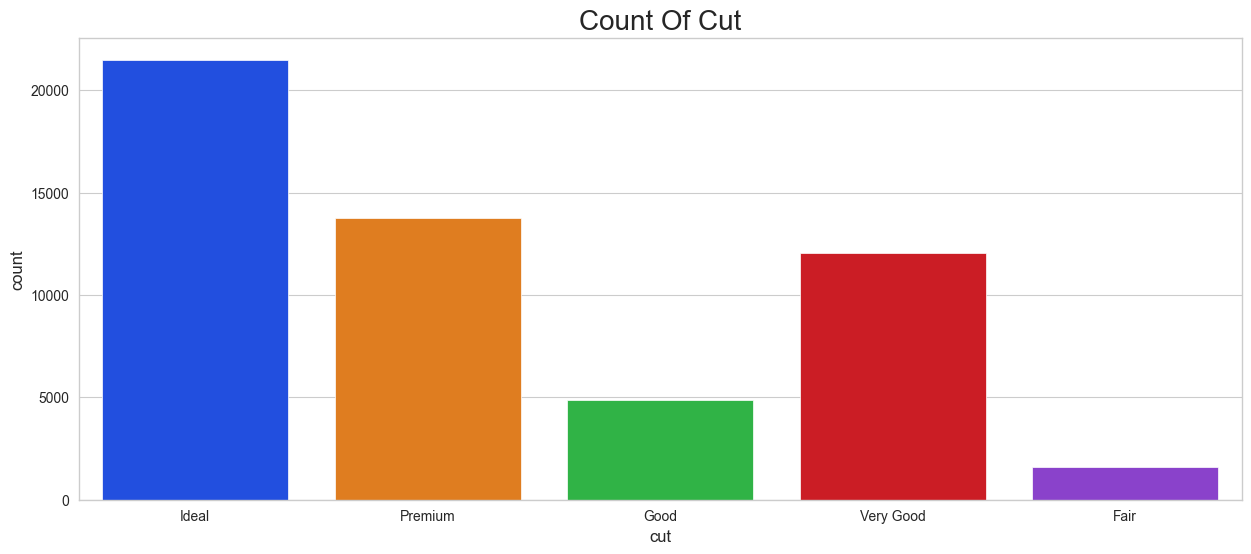

In [20]:
plt.figure(figsize = (15,6))
sns.countplot(data = categorial_data, 
              x = "cut",
              palette = color)

plt.title("Count Of Cut", size = 20)
plt.show()

In [21]:
# from the above figure we saw that the majority of cut's are ideal which is greater than 20k

In [22]:
df["color"].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

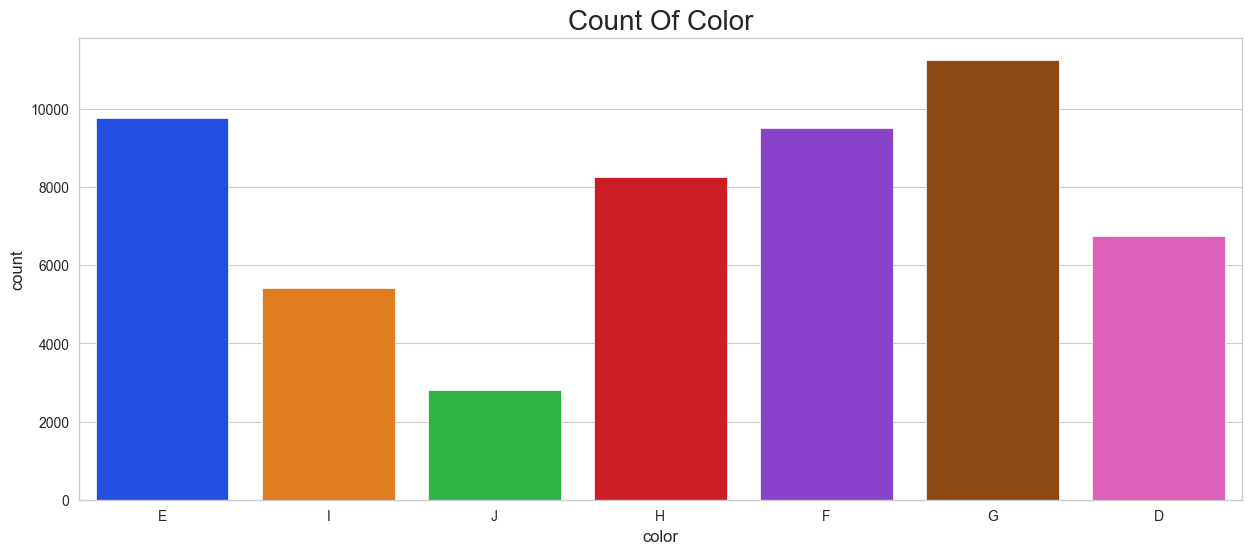

In [23]:
plt.figure(figsize = (15,6))
sns.countplot(data = categorial_data, 
              x = "color",
              palette = color)

plt.title("Count Of Color", size = 20)
plt.show()

In [24]:
# from the above figure we saw that the Majority count color belongs to G color

In [25]:
df["clarity"].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

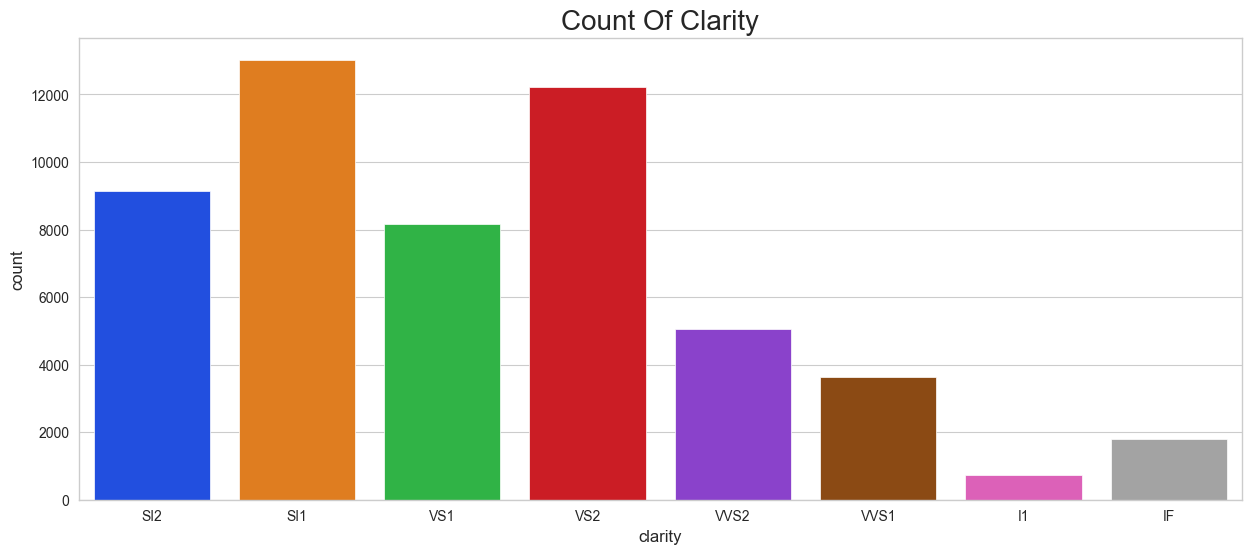

In [26]:
plt.figure(figsize = (15,6))
sns.countplot(data = categorial_data, 
              x = "clarity",
              palette = color)

plt.title("Count Of Clarity", size = 20)
plt.show()

In [27]:
# from the above figure we saw that the majority of clarity belongs to Sl1

In [28]:
# Numerical Features

In [29]:
numerical_data = df.select_dtypes(exclude = "object")
numerical_data.head(2)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31


In [30]:
from scipy.stats import describe

In [31]:
for column in df.select_dtypes(include=['number']).columns:
    stats = describe(df[column])
    print(f"Statistics for column {column}:")
    print(stats)
    print("\n")

Statistics for column carat:
DescribeResult(nobs=53794, minmax=(0.2, 5.01), mean=0.7977800498196824, variance=0.22409831936403368, skewness=1.113620087695931, kurtosis=1.2469302165275327)


Statistics for column depth:
DescribeResult(nobs=53794, minmax=(43.0, 79.0), mean=61.74807971149199, variance=2.044640132251354, skewness=-0.11424707541026471, kurtosis=5.412374505327488)


Statistics for column table:
DescribeResult(nobs=53794, minmax=(43.0, 95.0), mean=57.45810871100866, variance=4.989322179098731, skewness=0.7922051963241679, kurtosis=2.774990266087351)


Statistics for column price:
DescribeResult(nobs=53794, minmax=(326, 18823), mean=3933.065081607614, variance=15905056.948174467, skewness=1.618194774670812, kurtosis=2.1781390482187835)


Statistics for column x:
DescribeResult(nobs=53794, minmax=(0.0, 10.74), mean=5.731214447707923, variance=1.2559567036627672, skewness=0.37961332054119185, kurtosis=-0.6291211874012506)


Statistics for column y:
DescribeResult(nobs=53794, min

In [32]:
# from the above summary statistics of numerical columns we saw that all the features having 
# 1) positive Skewed 
# 2) positive Kurtosis 

In [33]:
# Visualization of Numerical columns

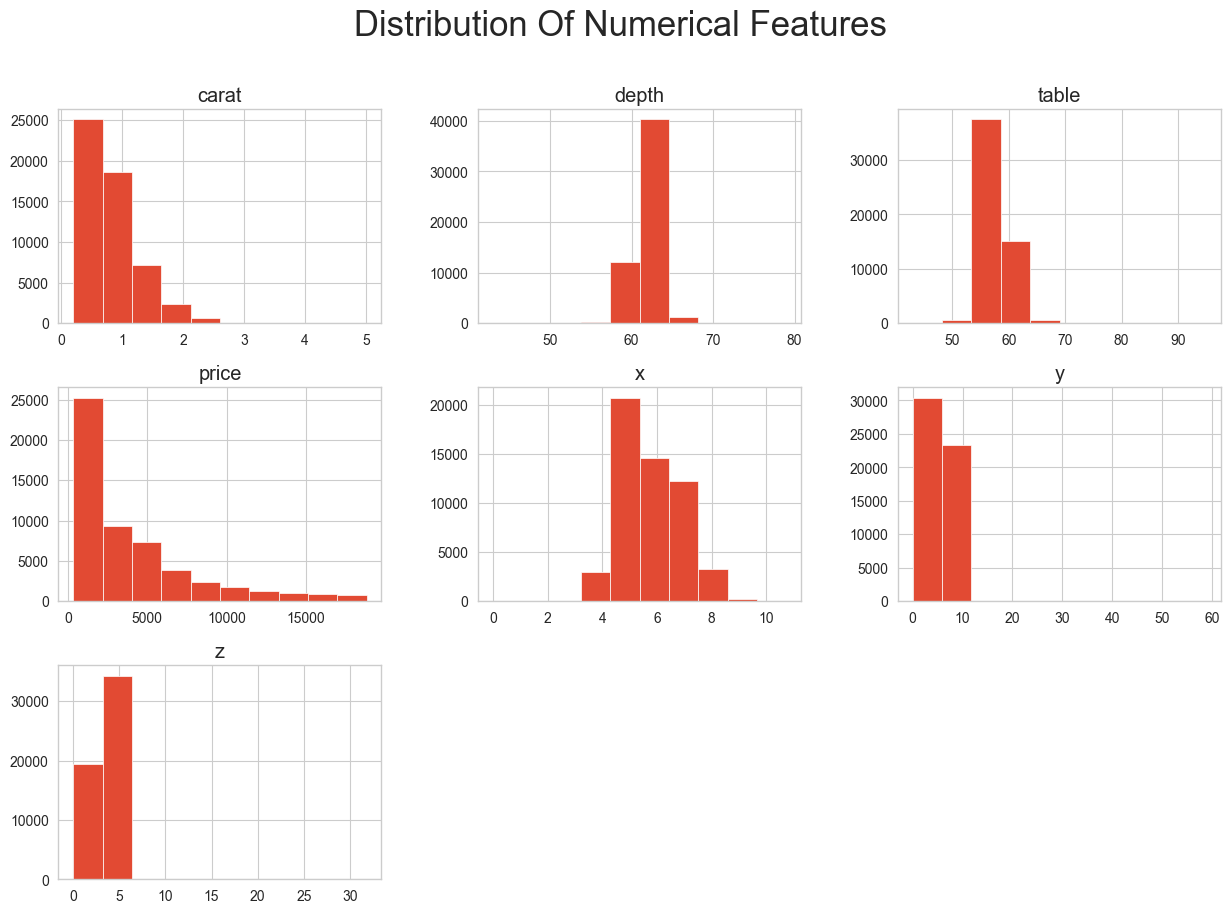

In [34]:
numerical_data.hist( figsize = (15,10))

plt.suptitle("Distribution Of Numerical Features", size = 25)
plt.show()

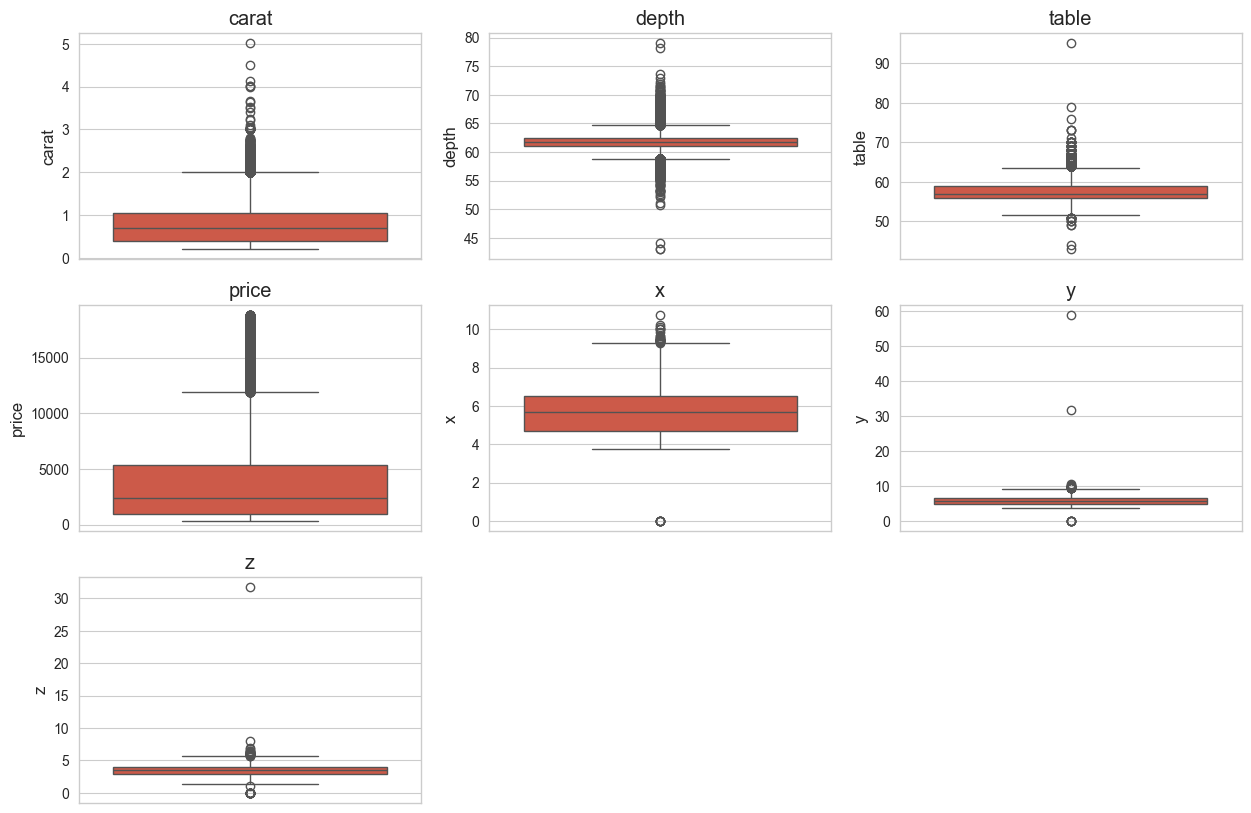

In [35]:
plt.figure(figsize = (15,10))
for i,j in enumerate(numerical_data.columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(df[j])
    plt.title(j)
plt.show()

In [36]:
# from the Visualization we found the insights 
# 1) All the features having some outliers
# 2) 50% datapoints of the price are below 2500$ 

### Bivariate analysis 

In [37]:
# Summary Statistics of cut with respect to Price

In [38]:
df.groupby('cut')['price'].describe().reset_index()

,cut,count,mean,std,min,25%,50%,75%,max
0,Fair,1598.0,4341.954318,3540.118138,337.0,2049.25,3282.0,5185.75,18574.0
1,Good,4891.0,3919.121039,3671.070930,327.0,1144.00,3042.0,5016.50,18788.0
2,Ideal,21488.0,3462.749953,3810.926394,326.0,878.00,1813.0,4686.75,18806.0
3,Premium,13748.0,4583.501891,4348.052680,326.0,1046.00,3182.0,6296.00,18823.0
4,Very Good,12069.0,3981.016157,3934.813175,336.0,912.00,2647.0,5371.00,18818.0


In [39]:
# Cut: The cut quality also affects prices, with "Premium" and "Very Good" cuts having higher mean prices. 
# Including cut in model is a good idea, as it captures the quality aspect of the diamonds.

In [40]:
cut_price = df.groupby('cut').agg( count = ('price', 'count'),
                                   price_sum = ('price', 'sum'),
                                   price_mean = ('price', 'mean')).reset_index()

cut_price

,cut,count,price_sum,price_mean
0,Fair,1598,6938443,4341.954318
1,Good,4891,19168421,3919.121039
2,Ideal,21488,74407571,3462.749953
3,Premium,13748,63013984,4583.501891
4,Very Good,12069,48046884,3981.016157


In [41]:
# lets's see visualization of cut with price

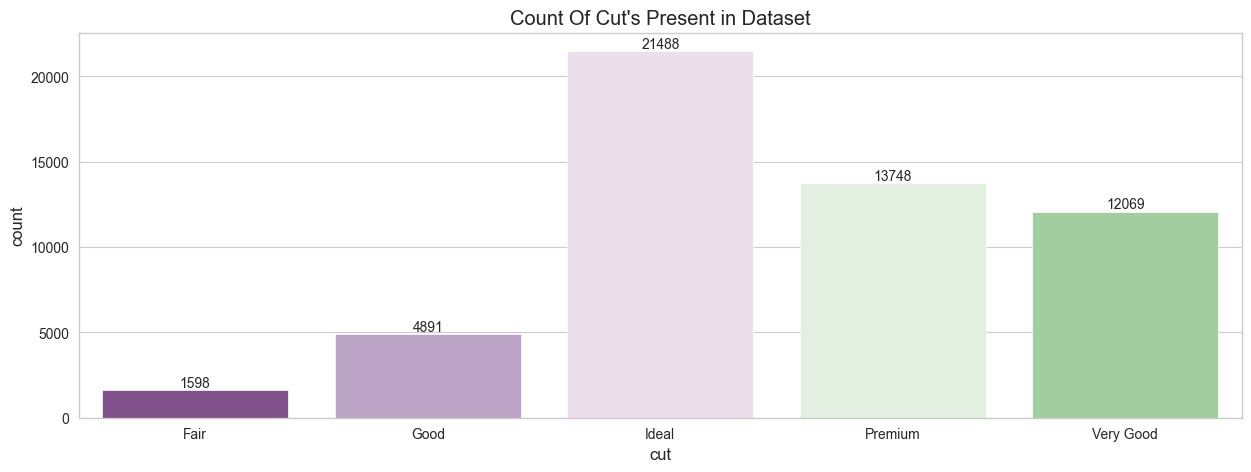

In [42]:
plt.figure( figsize = (15,5))
ax = sns.barplot( data = cut_price ,
            x = "cut" ,
            y = "count" ,
            palette = sns.color_palette("PRGn")
           )

for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Count Of Cut's Present in Dataset")
plt.show()

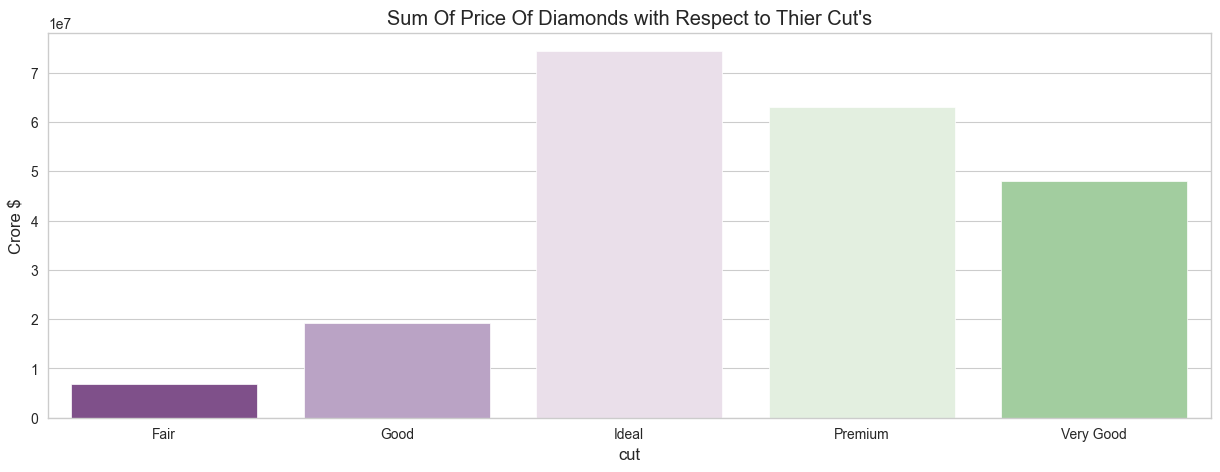

In [43]:
plt.figure( figsize = (15,5))
sns.barplot( data = cut_price ,
            x = "cut" ,
            y = "price_sum" ,
            palette = sns.color_palette("PRGn")
           )
plt.ylabel("Crore $")
plt.title("Sum Of Price Of Diamonds with Respect to Thier Cut's")
plt.show()

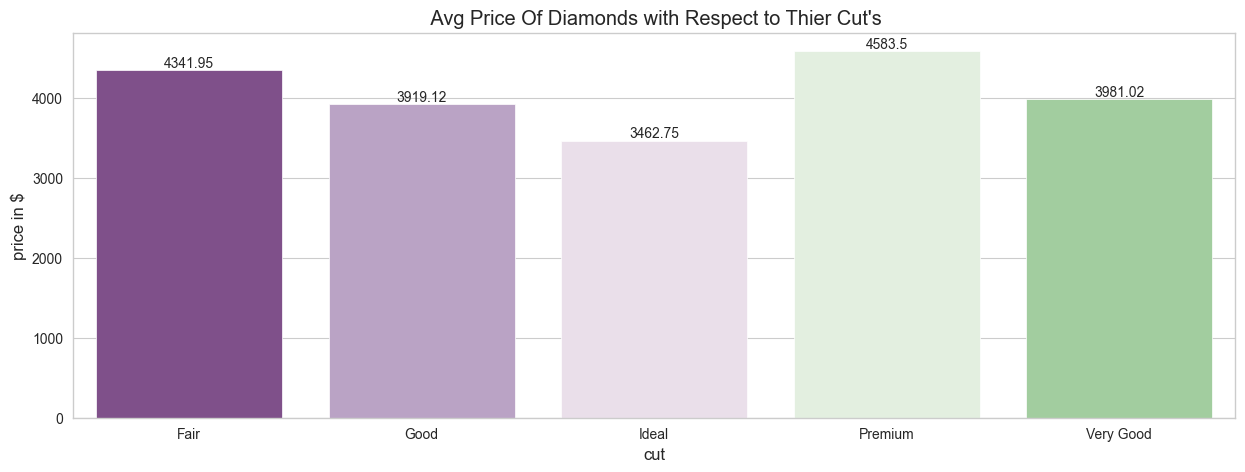

In [44]:
plt.figure( figsize = (15,5))
ax = sns.barplot( data = cut_price ,
            x = "cut" ,
            y = "price_mean" ,
            palette = sns.color_palette("PRGn")
            )

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("price in $")
plt.title(" Avg Price Of Diamonds with Respect to Thier Cut's")
plt.show()

In [44]:
# From the above visuals we saw that ideal cut has the majority of counts but still the avg price is low than fair cut
# which means Fair cut is costly 

In [45]:
# Summary Statistics of color

In [45]:
df.groupby('color')['price'].describe().reset_index()

,color,count,mean,std,min,25%,50%,75%,max
0,D,6755.0,3174.441007,3359.275179,357.0,911.0,1842.0,4214.50,18693.0
1,E,9776.0,3079.608020,3346.668862,326.0,882.0,1741.5,4004.00,18731.0
2,F,9520.0,3726.749580,3786.499787,342.0,982.0,2345.0,4876.75,18791.0
3,G,11262.0,4001.352069,4051.370351,354.0,932.0,2246.0,6048.00,18818.0
4,H,8272.0,4482.855174,4211.027964,337.0,985.5,3452.5,5975.00,18803.0
5,I,5407.0,5081.751248,4717.281497,334.0,1112.0,3720.0,7171.50,18823.0
6,J,2802.0,5326.415418,4433.735840,335.0,1864.0,4234.5,7695.00,18710.0


In [47]:
# Color: The color of the diamond impacts its price, 
# with better colors (e.g., D, E) having lower mean prices compared to worse colors (e.g., J). 
# Including color in model will help capture this aspect of diamond valuation.

In [46]:
color_price = df.groupby('color').agg( count = ('price', 'count'),
                                       color_sum = ('price', 'sum'),
                                       color_mean = ('price', 'mean')).reset_index()

color_price

,color,count,color_sum,color_mean
0,D,6755,21443349,3174.441007
1,E,9776,30106248,3079.608020
2,F,9520,35478656,3726.749580
3,G,11262,45063227,4001.352069
4,H,8272,37082178,4482.855174
5,I,5407,27477029,5081.751248
6,J,2802,14924616,5326.415418


In [49]:
# lets see visualization of color with price

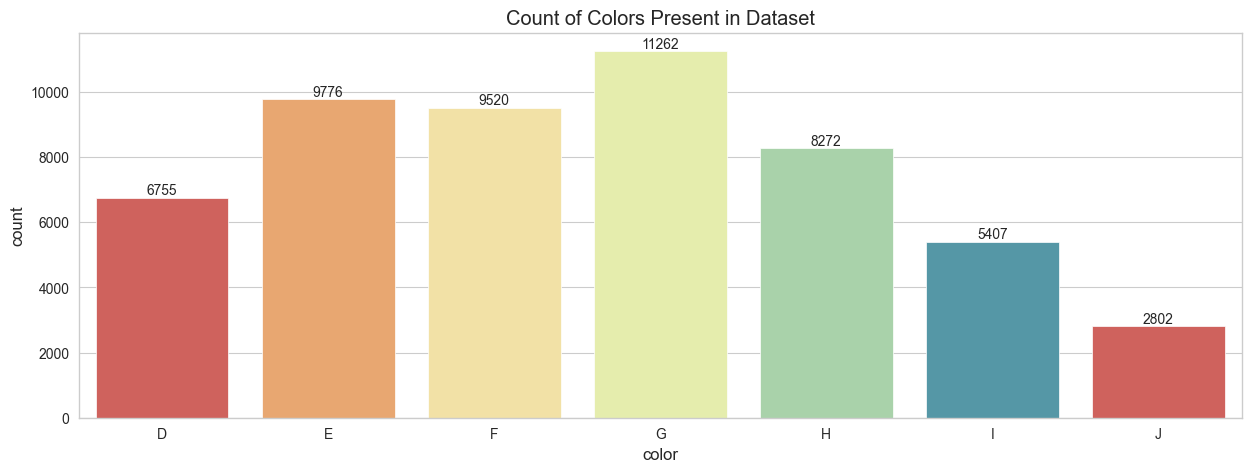

In [47]:
plt.figure( figsize = (15,5))
ax = sns.barplot( data = color_price ,
                  x = 'color',
                  y = "count",
                  palette = sns.color_palette("Spectral"))

for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Count of Colors Present in Dataset")
plt.show()

In [51]:
# color G has the majority of counts 

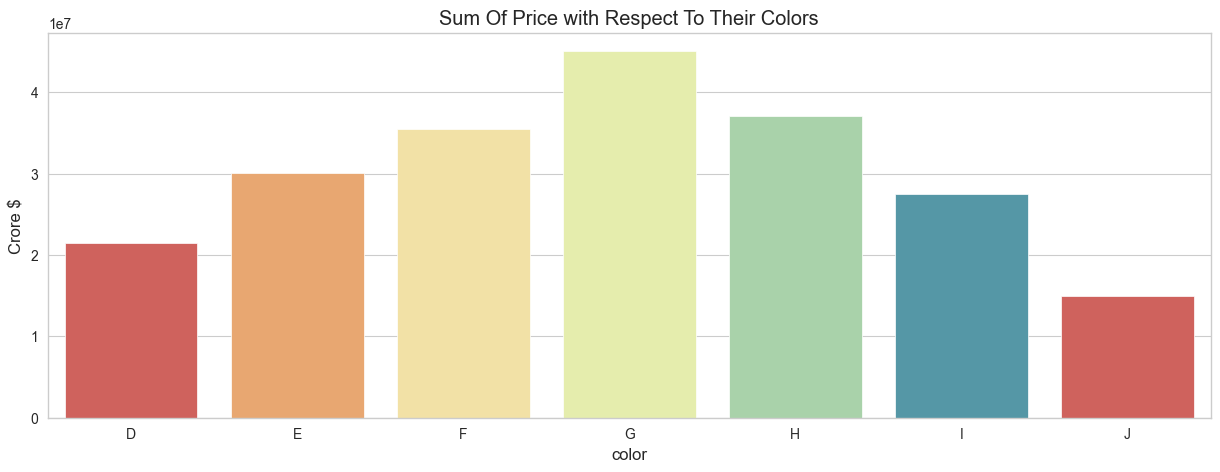

In [48]:
plt.figure( figsize = (15,5))
sns.barplot( data = color_price ,
                  x = 'color',
                  y = "color_sum",
                  palette = sns.color_palette("Spectral")
                )
plt.ylabel("Crore $")
plt.title("Sum Of Price with Respect To Their Colors")
plt.show()

In [53]:
# the sum of price of color G is highest because it has the majority of counts 

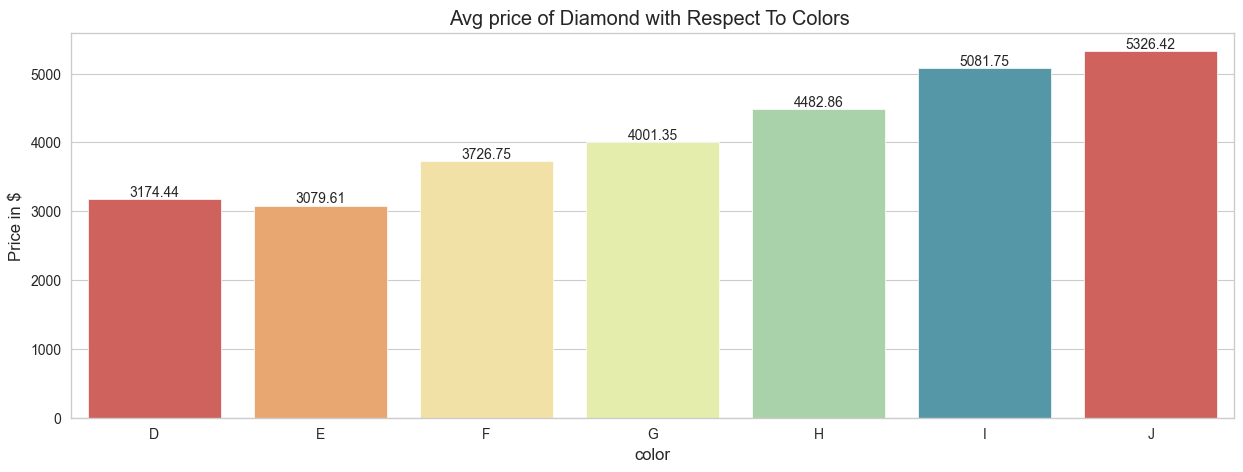

In [49]:
plt.figure( figsize = (15,5))
ax = sns.barplot( data = color_price ,
                  x = 'color',
                  y = "color_mean",
                  palette = sns.color_palette("Spectral"))

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("Price in $")
plt.title("Avg price of Diamond with Respect To Colors ")
plt.show()

In [55]:
# from the above visuals we saw the insights 
# the avg price of color J is greater than G even though there are less counts of color J
# it means the price color J is costly

In [56]:
# Summary statistics of Clarity with respect to price

In [50]:
df.groupby('clarity')['price'].describe().reset_index()

,clarity,count,mean,std,min,25%,50%,75%,max
0,I1,740.0,3925.275676,2808.514795,345.0,2077.00,3346.0,5163.25,18531.0
1,IF,1784.0,2870.569507,3925.564866,369.0,895.00,1080.0,2391.50,18806.0
2,SI1,13032.0,3996.165132,3799.392104,326.0,1090.00,2822.0,5250.00,18818.0
3,SI2,9150.0,5057.455410,4255.111031,326.0,2264.00,4071.5,5764.00,18804.0
4,VS1,8156.0,3841.611329,4011.265796,327.0,876.00,2010.0,6025.75,18795.0
5,VS2,12229.0,3927.741516,4041.799932,334.0,900.00,2061.0,6028.00,18823.0
6,VVS1,3647.0,2526.602961,3337.653276,336.0,816.00,1094.0,2383.50,18777.0
7,VVS2,5056.0,3286.532437,3823.399309,336.0,794.75,1316.0,3646.75,18768.0


In [58]:
# Clarity: The mean prices and standard deviations suggest that clarity significantly impacts diamond prices. 
# Higher clarity grades (e.g., IF, VVS1) generally have lower mean prices compared to lower clarity grades (e.g., I1, SI2). 
# Including clarity in model could improve its predictive power.

In [51]:
clarity_price = df.groupby('clarity').agg( count = ('price','count'),
                                           clarity_sum = ('price','sum'),
                                           clarity_mean = ('price','mean')).reset_index()
clarity_price

,clarity,count,clarity_sum,clarity_mean
0,I1,740,2904704,3925.275676
1,IF,1784,5121096,2870.569507
2,SI1,13032,52078024,3996.165132
3,SI2,9150,46275717,5057.455410
4,VS1,8156,31332182,3841.611329
5,VS2,12229,48032351,3927.741516
6,VVS1,3647,9214521,2526.602961
7,VVS2,5056,16616708,3286.532437


In [60]:
# lets see visualization of clarity with price

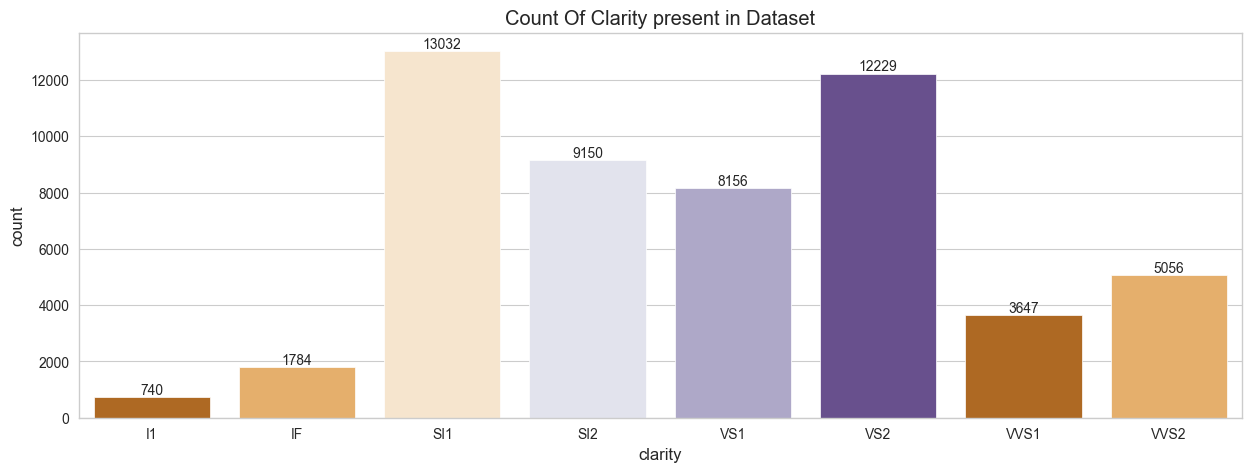

In [52]:
plt.figure( figsize = (15,5))
ax = sns.barplot( data = clarity_price ,
                  x = 'clarity',
                  y = "count",
                  palette = sns.color_palette("PuOr"))

for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Count Of Clarity present in Dataset")
plt.show()

In [62]:
# Sl1 has the majority of counts

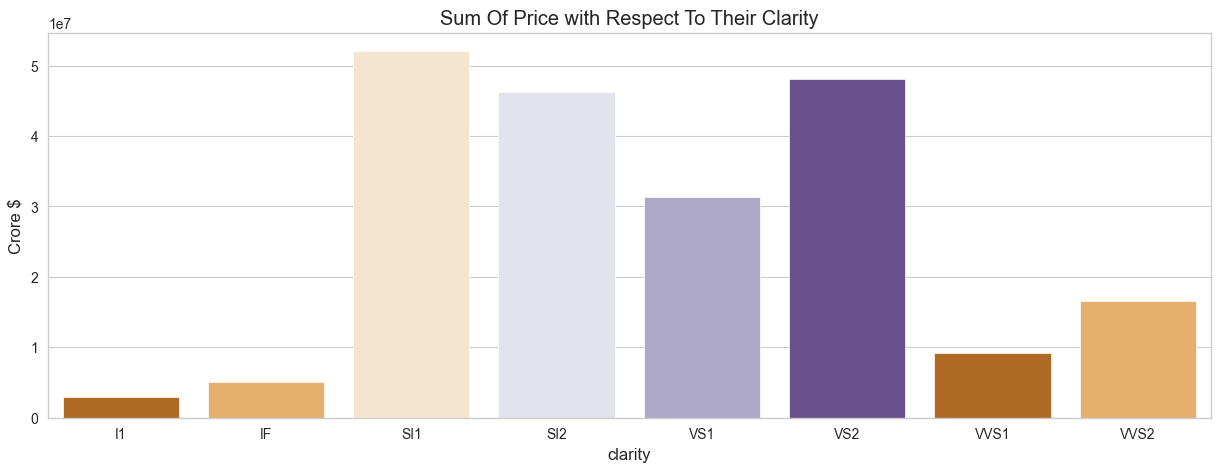

In [53]:
plt.figure( figsize = (15,5))
sns.barplot( data = clarity_price ,
                  x = 'clarity',
                  y = "clarity_sum",
                  palette = sns.color_palette("PuOr")
                )
plt.ylabel("Crore $")
plt.title("Sum Of Price with Respect To Their Clarity")
plt.show()

In [64]:
# Sum of price with respect to Sl1 clarity is highest 

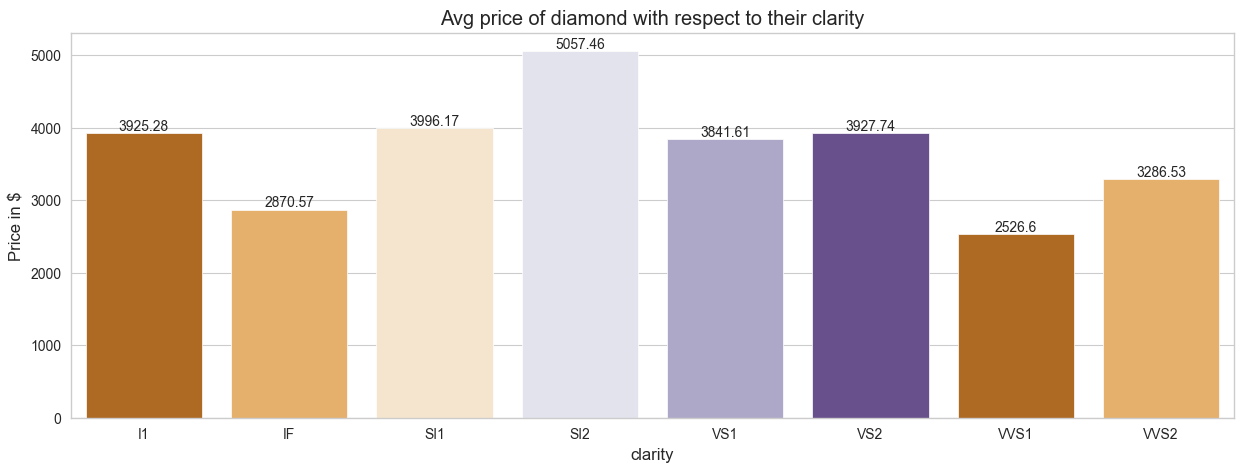

In [54]:
plt.figure( figsize = (15,5))
ax = sns.barplot( data = clarity_price ,
                  x = 'clarity',
                  y = "clarity_mean",
                  palette = sns.color_palette("PuOr"))

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("Price in $")
plt.title("Avg price of diamond with respect to their clarity")
plt.show()

In [66]:
# from the above visuals we saw thaht 
# 1) the Avg price of dimaond with respect to sl2 clarity is highest 
# 2) sl1 has the highest count of clarity but still it has low avg price than other cuts
# 3) sl2 clarity diamond is costly 

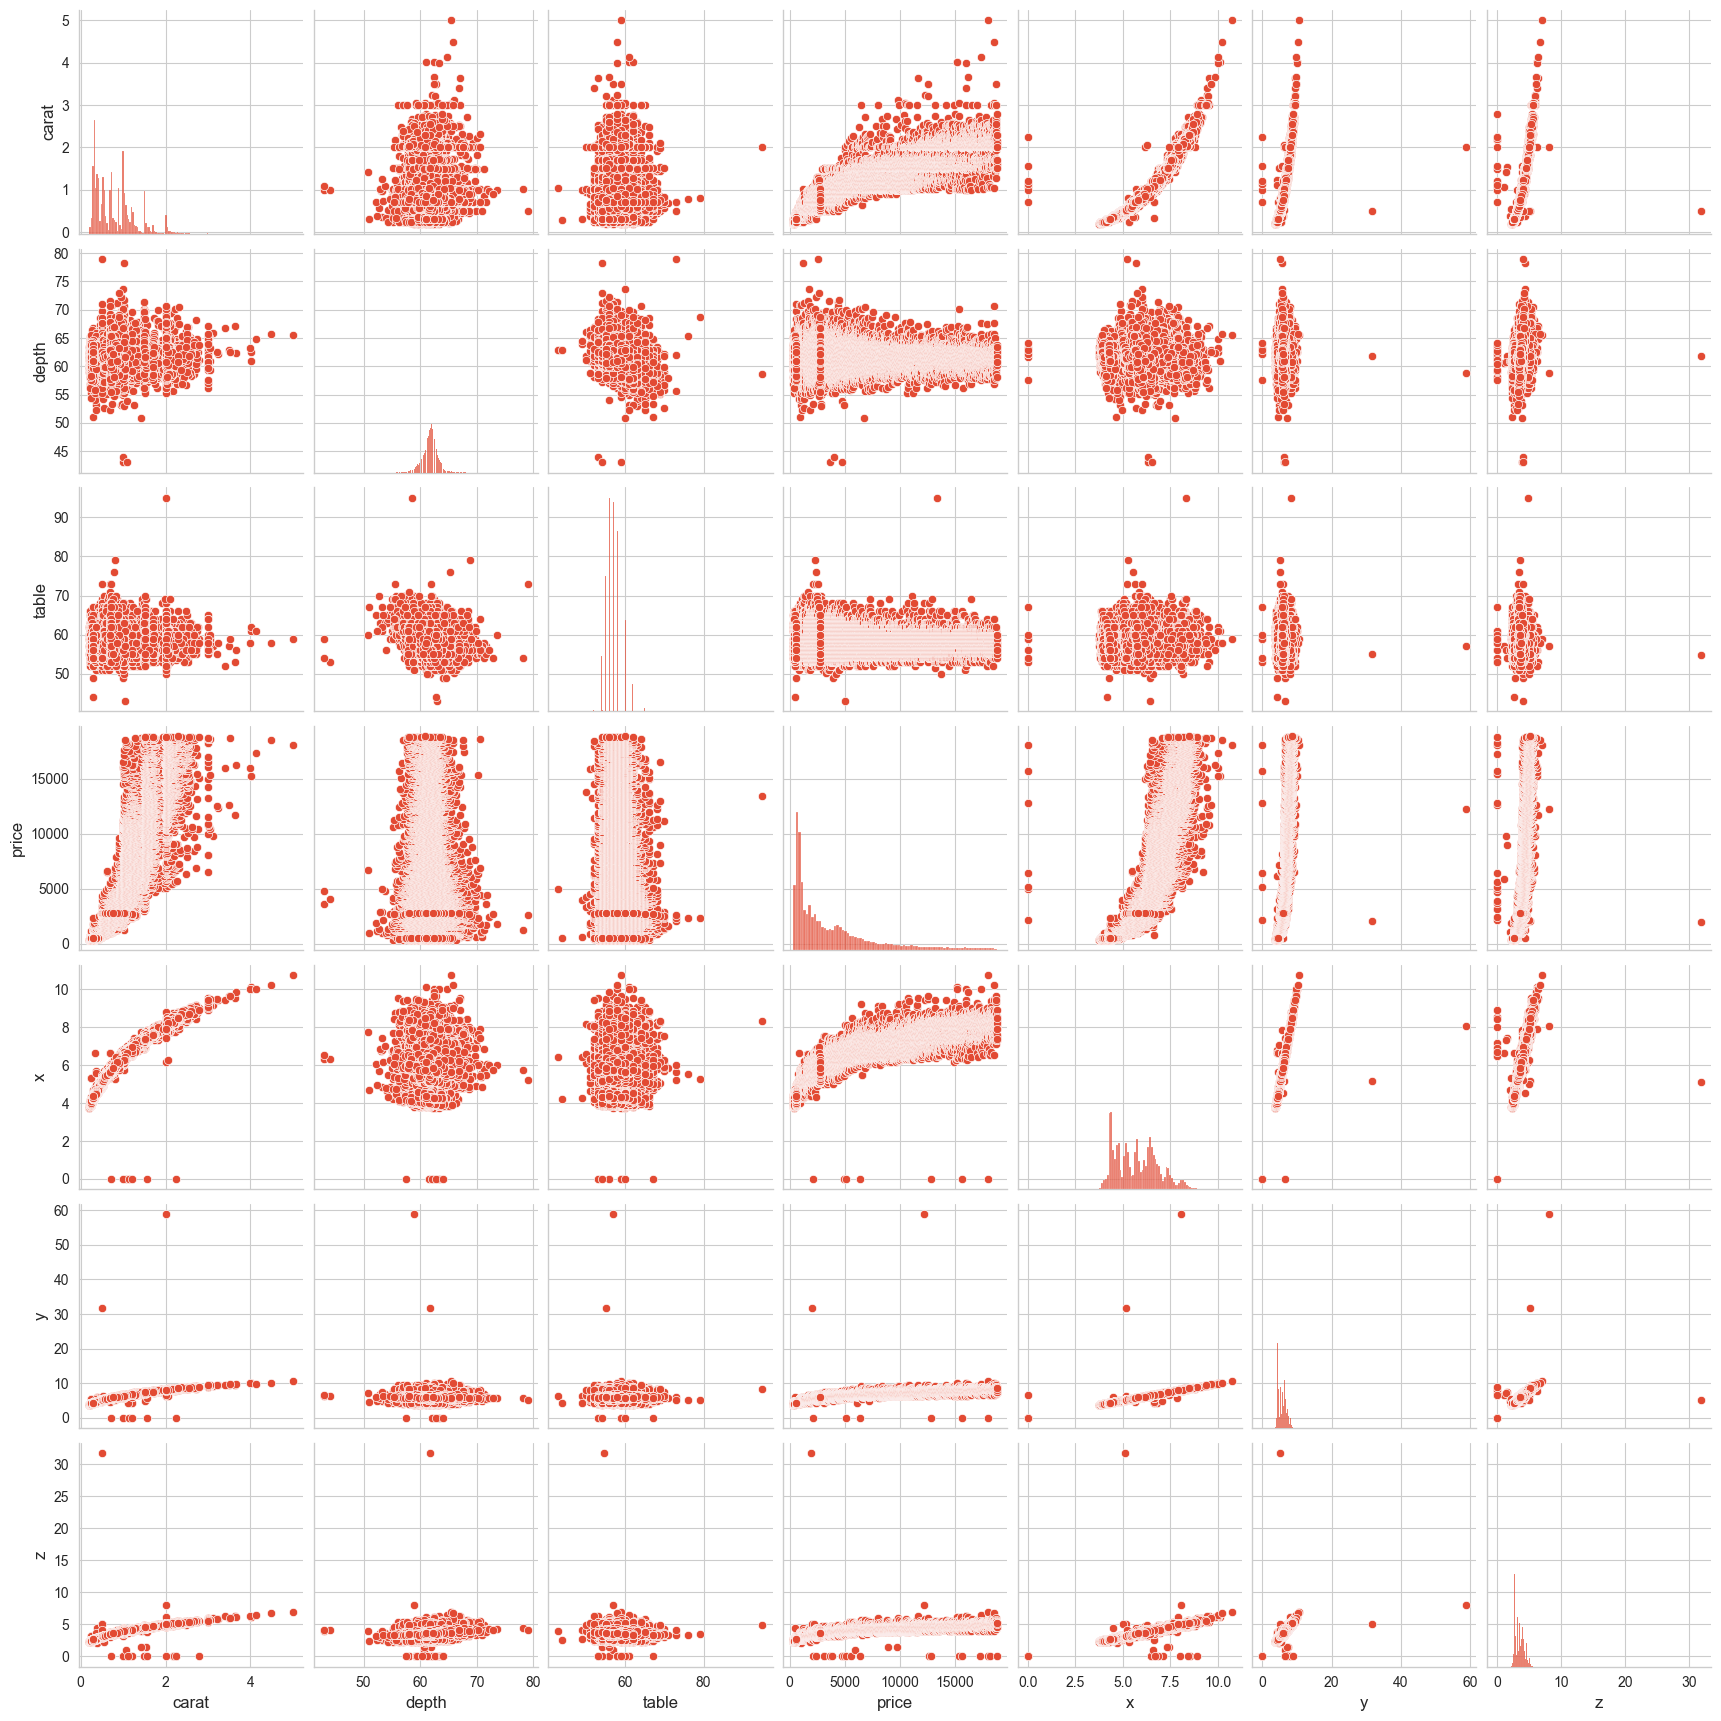

In [55]:
sns.pairplot(df)
plt.show()

## Let's check the relationship of all the feature with target variable

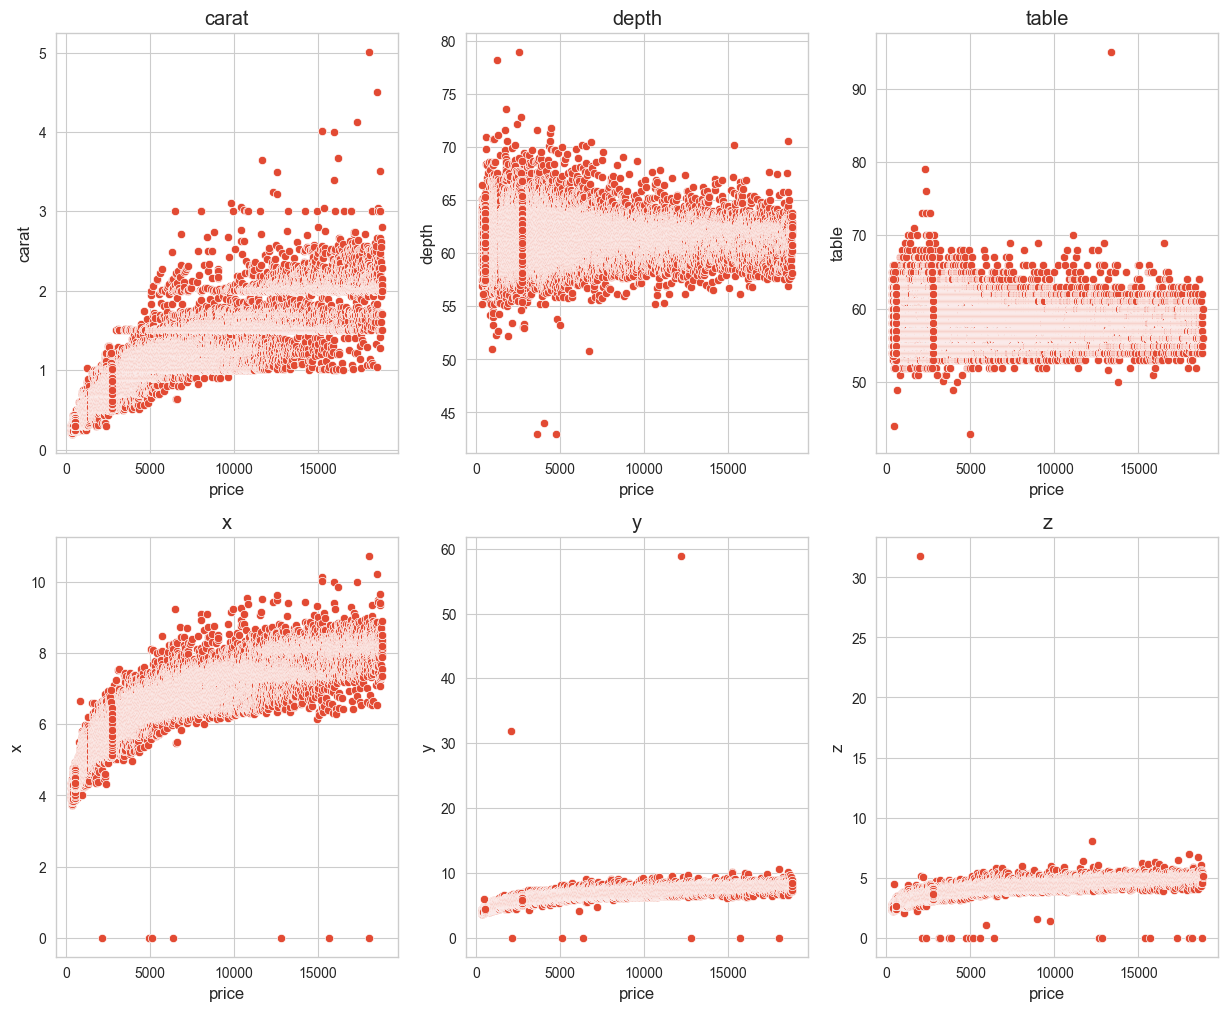

In [56]:
f = ['carat', 'depth', 'table', 'x', 'y', 'z']

plt.figure(figsize = (15,12))
for i,j in enumerate(f,1):
    plt.subplot(2,3,i)
    sns.scatterplot(x = df['price'] , y = df[j])
    plt.title(j)

plt.show()

In [69]:
# Now let’s start analyze diamond prices I will analyze the relationship between the carat and the price of the diamond 
# to see how the number of carats affects the price of a diamond

### Multivariate Analysis

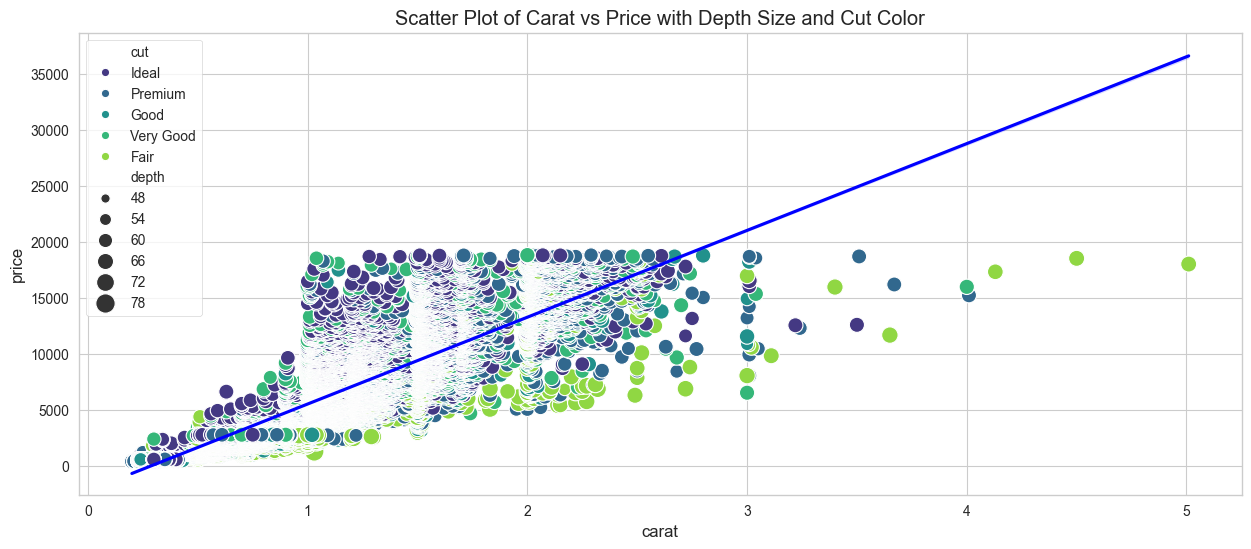

In [57]:

plt.figure(figsize=(15, 6))

sns.scatterplot(data=df, x="carat", y="price",size = "depth", hue="cut", palette="viridis", sizes=(20, 200))

sns.regplot(data=df, x="carat", y="price", scatter=False, color="blue", line_kws={"label": "OLS trendline"})

plt.title("Scatter Plot of Carat vs Price with Depth Size and Cut Color")
plt.legend()
plt.show()


In [ ]:
# We can see a linear relationship between the number of carats and the price of a diamond. 
# It means higher carats result in higher prices.

# Feature Engineering

In [ ]:
# Now I will add a new column to this dataset by calculating the size (length x width x depth) of the diamond

In [60]:
df["size"] = df["x"] * df["y"] * df["z"]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [ ]:
# Now let’s have a look at the relationship between the size of a diamond and its price

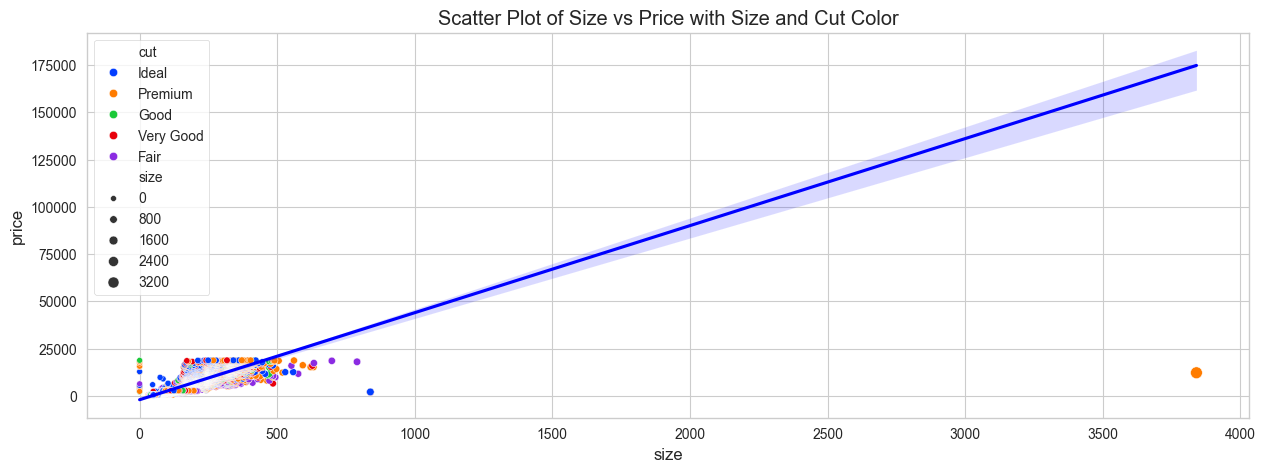

In [61]:
plt.figure(figsize = (15,5))
sns.scatterplot( data = df,
                x = "size" , 
                y = "price",
                hue = "cut",
                size = "size",
                palette = color
                )
sns.regplot(data = df, x="size", y="price", scatter=False, color="blue", line_kws={"label": "OLS trendline"}) 

plt.title("Scatter Plot of Size vs Price with Size and Cut Color") 
plt.legend() 
plt.show()

In [ ]:
# The above figure concludes two features of diamonds:

# Premium cut diamonds are relatively large than other diamonds
# There’s a linear relationship between the size of all types of diamonds and their prices

In [ ]:
# Now let’s have a look at the prices of all the types of diamonds based on their colour

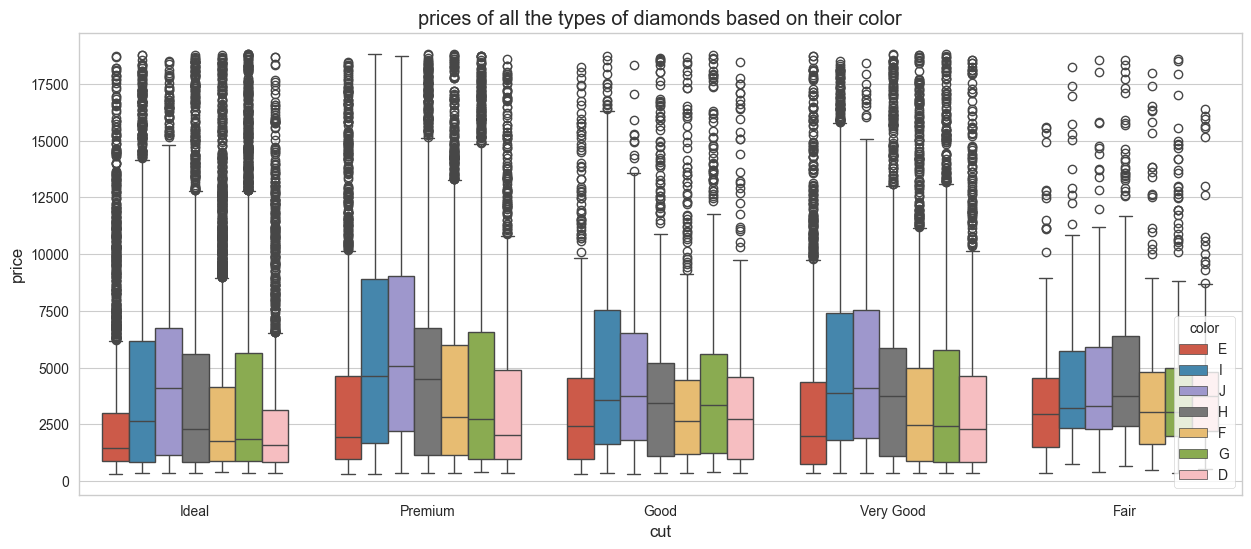

In [62]:
plt.figure(figsize = (15,6))
sns.boxplot( data = df ,
             x = "cut" ,
             y = "price" ,
             hue = "color")

plt.title("prices of all the types of diamonds based on their color")
plt.show()

In [ ]:
# Now let’s have a look at the prices of all the types of diamonds based on their clarity:

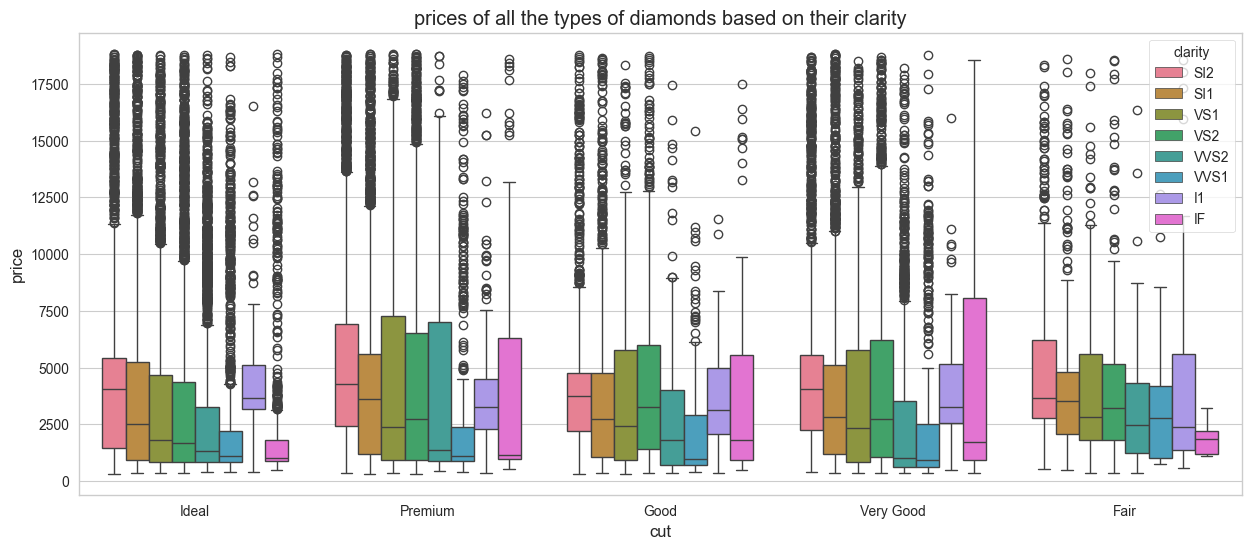

In [63]:
plt.figure(figsize = (15,6))
sns.boxplot( data = df ,
             x = "cut" ,
             y = "price" ,
             hue = "clarity")

plt.title("prices of all the types of diamonds based on their clarity")
plt.show()

### Label Encoding For categorial Features

In [ ]:
# Before moving forward, I will convert the values of the cut column as the cut type of diamonds is a valuable feature to predict the price of a diamond.
# To use this column, we need to convert its categorical values into numerical values.

In [66]:
df["cut"] = df["cut"].map({ "Ideal": 1, 
                            "Premium": 2, 
                            "Good": 3,
                            "Very Good": 4,
                            "Fair": 5 })

In [67]:
df["color"] = df["color"].map( {"J": 1, 
                                "I": 2, 
                                "H": 3, 
                                "G": 4, 
                                "F": 5, 
                                "E": 6, 
                                "D": 7 }
                              )

In [68]:
df["clarity"] = df["clarity"].map( {"I1": 1, 
                                    "SI2": 2, 
                                    "SI1": 3, 
                                    "VS2": 4, 
                                    "VS1": 5, 
                                    "VVS2": 6, 
                                    "VVS1": 7, 
                                    "IF": 8}
                                 )

Now let’s have a look at the correlation between diamond prices and other features in the dataset:

In [69]:
corr_matrix = df.corr()
corr_matrix.sort_values(by = "price", ascending = False)["price"]

price      1.000000
carat      0.921548
size       0.902231
x          0.884504
y          0.865395
z          0.861208
table      0.126566
cut        0.048440
depth     -0.011048
clarity   -0.146149
color     -0.171825
Name: price, dtype: float64

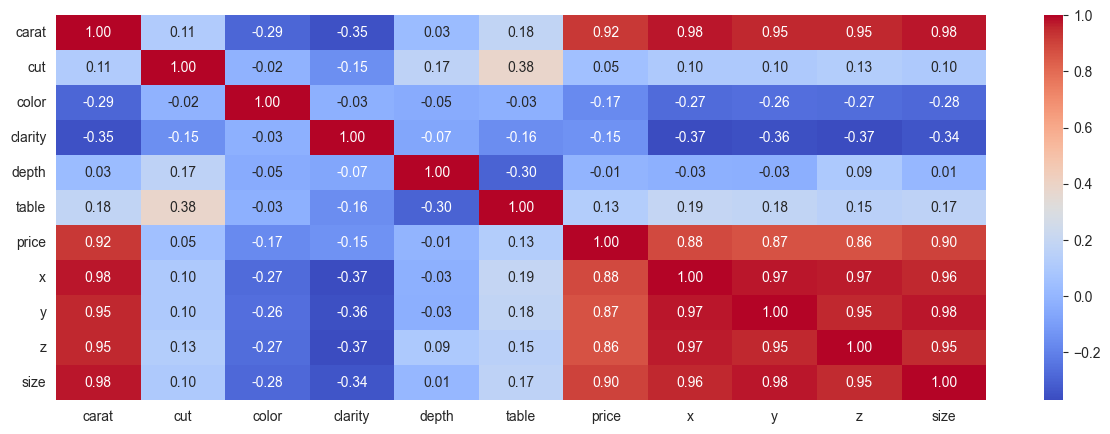

In [70]:
plt.figure(figsize = (15,5))
sns.heatmap( corr_matrix , annot = True , fmt = "1.2f", cmap = "coolwarm")
plt.show()

## Keeping Outliers

Outliers are meaningful data points, not errors in this dataset.
Example A few diamonds are legitimately much larger or more expensive than others due to unique features.
they represent valid data points reflecting the high variability of diamond pricing.

## Diamond Price Prediction

In [ ]:
# Now, I will move to the task of predicting diamond prices by using all the necessary information from the diamond price analysis done above.

In [ ]:
# NOTE :-  after checking with clarity ,color, cut i found the cut feature is best among all of them 
# selecting all of them togeather leads to overfitting 

In [71]:
#splitting data

from sklearn.model_selection import train_test_split

x = np.array(df[["carat", "cut", "size"]])
y = np.array(df[["price"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.10, 
                                                    random_state=42)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

### Tree-Based Models (No Scaling)

### Decision Tree

In [64]:

dt_params = {
                'max_depth': [None, 5, 10, 15, 20],                # Limits the depth of the tree
                'min_samples_split': [2, 5, 10],                   # Minimum samples required to split a node
                'min_samples_leaf': [1, 2, 5, 10],                 # Minimum samples in a leaf node
                'max_features': [None, 'sqrt', 'log2'],            # Number of features for the best split
                'criterion': ['squared_error', 'friedman_mse'],    # Split quality function
                'splitter': ['best', 'random']                     # Split strategy
            }

dt =  GridSearchCV(
                      DecisionTreeRegressor(random_state=42),
                      param_grid=dt_params,
                      cv=5,
                      scoring='neg_mean_squared_error',
                      n_jobs=-1
                  )

# Fit the model
dt.fit(x_train, y_train)

# best parameters and model
dt_best = dt.best_estimator_
y_pred_dt = dt_best.predict(x_test)

train_r2_dt = r2_score(y_train, dt_best.predict(x_train))
test_r2_dt = r2_score(y_test, y_pred_dt)
train_mse_dt = mean_squared_error(y_train, dt_best.predict(x_train))
test_mse_dt = mean_squared_error(y_test, y_pred_dt)


In [65]:
print("Decison Tree Results")
print("Train R2 Score:" , train_r2_dt*100)
print("Test R2 Score: ", test_r2_dt*100)
print("Train RMSE: ", np.sqrt(train_mse_dt))
print("Test RMSE: ",  np.sqrt(test_mse_dt))

Decison Tree Results
Train R2 Score: 88.665086624618
Test R2 Score:  87.72025087462981
Train RMSE:  1346.8558599339776
Test RMSE:  1357.5374685466222


### Random Forest

In [66]:
rf_params = {
            'n_estimators': [100, 200],                
            'max_depth': [10, 15, 20, None],            
            'min_samples_split': [2, 5],                  
            'min_samples_leaf': [1, 2, 5],
            'max_features': [None, 'sqrt', 'log2']
            }

rf = GridSearchCV(  
                    RandomForestRegressor(random_state=42), 
                    param_grid = rf_params, 
                    cv = 5, 
                    scoring='neg_mean_squared_error', 
                    n_jobs=-1)

rf.fit(x_train, y_train)
rf_best = rf.best_estimator_
y_pred_rf = rf_best.predict(x_test)

train_r2_rf = r2_score(y_train, rf_best.predict(x_train))
test_r2_rf = r2_score(y_test, y_pred_rf)
train_mse_rf = mean_squared_error(y_train, rf_best.predict(x_train))
test_mse_rf = mean_squared_error(y_test, y_pred_rf)


In [67]:
print("Random Forest Results")
print("Train R2 Score:" , train_r2_rf*100)
print("Test R2 Score: ", test_r2_rf*100)
print("Train RMSE: ", np.sqrt(train_mse_rf))
print("Test RMSE: ",  np.sqrt(test_mse_rf))

Random Forest Results
Train R2 Score: 89.72118111484465
Test R2 Score:  87.98383100151518
Train RMSE:  1282.5775218556873
Test RMSE:  1342.8889240454366


### Feature importance

Feature names :['carat', 'cut', 'size']
Feature importance[0.50956924 0.0113501  0.47908066]


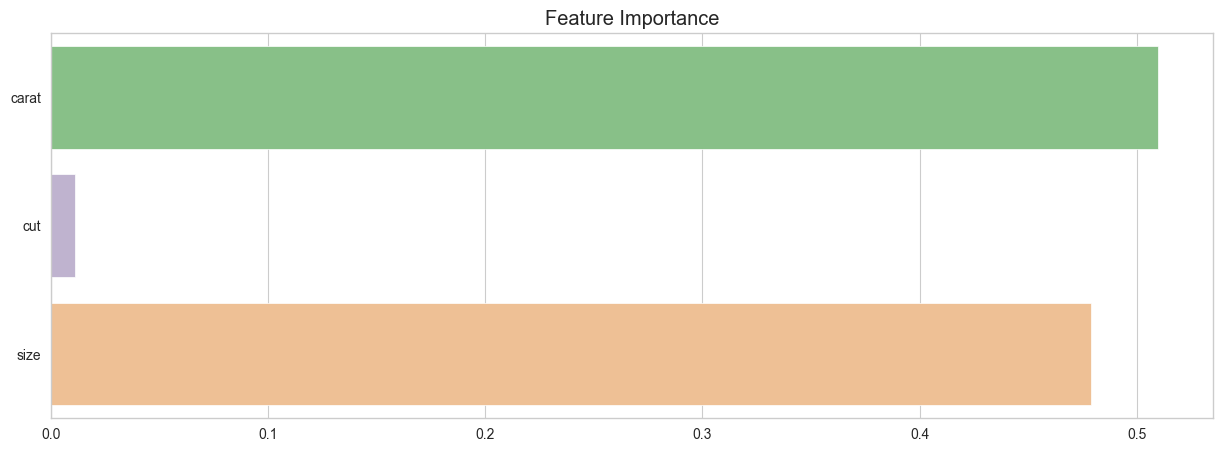

In [68]:
plt.figure( figsize = (15,5))
feature_names = ["carat", "cut", "size"]
feature_imp = rf_best.feature_importances_

print(f'Feature names :{feature_names}')
print(f'Feature importance{feature_imp}')

sns.barplot(y = feature_names , x = feature_imp , orient = "h", palette = "Accent")
plt.title("Feature Importance")
plt.show()

### AdaBoost

In [71]:
ada_params = {
              'n_estimators': [50, 100],
              'learning_rate': [0.01, 0.1, 1.0]
             }

ada = GridSearchCV( AdaBoostRegressor(random_state=42), 
                   param_grid = ada_params , 
                   cv = 3 , 
                   scoring = 'neg_mean_squared_error', 
                   n_jobs = -1)

ada.fit(x_train, y_train)
ada_best = ada.best_estimator_
y_pred_ada = ada_best.predict(x_test)

train_r2_ada = r2_score(y_train, ada_best.predict(x_train))
test_r2_ada = r2_score(y_test, y_pred_ada)
train_mse_ada = mean_squared_error(y_train, ada_best.predict(x_train))
test_mse_ada = mean_squared_error(y_test, y_pred_ada)


In [72]:
print("Ada Boost Results")
print("Train R2 Score:" , train_r2_ada*100)
print("Test R2 Score: ", test_r2_ada*100)
print("Train RMSE: ", np.sqrt(train_mse_ada))
print("Test RMSE: ",  np.sqrt(test_mse_ada))

Ada Boost Results
Train R2 Score: 86.97423908474258
Test R2 Score:  86.6317775263143
Train RMSE:  1443.8217130047472
Test RMSE:  1416.4260656035003


### Xgboost

In [73]:
xgb_params = {
              'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7]
             }

xgb = GridSearchCV(  XGBRegressor(random_state=42), 
                     param_grid = xgb_params, 
                     cv = 3, 
                     scoring = 'neg_mean_squared_error',
                     n_jobs = -1 
                  )


xgb.fit(x_train, y_train)
xgb_best = xgb.best_estimator_
y_pred_xgb = xgb_best.predict(x_test)

train_r2_xgb = r2_score(y_train, xgb_best.predict(x_train))
test_r2_xgb = r2_score(y_test, y_pred_xgb)
train_mse_xgb = mean_squared_error(y_train, xgb_best.predict(x_train))
test_mse_xgb = mean_squared_error(y_test, y_pred_xgb)


In [74]:
print("XGB Results")
print("Train R2 Score:" , train_r2_xgb*100)
print("Test R2 Score: ", test_r2_xgb*100)
print("Train RMSE: ", np.sqrt(train_mse_xgb))
print("Test RMSE: ",  np.sqrt(test_mse_xgb))

XGB Results
Train R2 Score: 88.75103639279641
Test R2 Score:  87.96525345890957
Train RMSE:  1341.7397099720733
Test RMSE:  1343.926606734888


### Models That Requires Scaling

### SVR

In [75]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [80]:
svr_param = {
             'C': [0.1, 1, 10],  
             'kernel': ['rbf'],  
             'gamma': ['scale', 'auto'] 
            }

svr = GridSearchCV(  SVR() , 
                     param_grid = svr_param, 
                     cv = 3, 
                     scoring = 'neg_mean_squared_error', 
                     n_jobs = -1 
                  )

svr.fit(x_train_scaled, y_train)
svr_best = svr.best_estimator_
y_pred_svr = svr_best.predict(x_test_scaled)

train_r2_svr = r2_score(y_train, svr_best.predict(x_train_scaled))
test_r2_svr = r2_score(y_test, y_pred_svr)
train_mse_svr = mean_squared_error(y_train, svr_best.predict(x_train_scaled))
test_mse_svr = mean_squared_error(y_test, y_pred_svr)


In [81]:
print("SVR Results")
print("Train R2 Score:" , train_r2_svr*100)
print("Test R2 Score: ", test_r2_svr*100)
print("Train RMSE: ", np.sqrt(train_mse_svr))
print("Test RMSE: ",  np.sqrt(test_mse_svr))

SVR Results
Train R2 Score: 85.54253771541657
Test R2 Score:  85.18286167500672
Train RMSE:  1521.1009985530757
Test RMSE:  1491.2115046771548


### kNN

In [78]:
knn_param = {
            'n_neighbors': [3, 5, 10],
            'weights': ['uniform', 'distance']
            }

knn = GridSearchCV(  KNeighborsRegressor(), 
                     param_grid = knn_param, 
                     cv = 3, 
                     scoring = 'neg_mean_squared_error', 
                     n_jobs = -1 
                  )

knn.fit(x_train_scaled, y_train)
knn_best = knn.best_estimator_
y_pred_knn = knn_best.predict(x_test_scaled)

train_r2_knn = r2_score(y_train, knn_best.predict(x_train_scaled))
test_r2_knn = r2_score(y_test, y_pred_knn)
train_mse_knn = mean_squared_error(y_train, knn_best.predict(x_train_scaled))
test_mse_knn = mean_squared_error(y_test, y_pred_knn)


In [79]:
print("Random Forest Results")
print("Train R2 Score:" , train_r2_knn*100)
print("Test R2 Score: ", test_r2_knn*100)
print("Train RMSE: ", np.sqrt(train_mse_knn))
print("Test RMSE: ",  np.sqrt(test_mse_knn))

Random Forest Results
Train R2 Score: 89.81960704348622
Test R2 Score:  87.00804825373373
Train RMSE:  1276.4220216884999
Test RMSE:  1396.3499615953058


### Linear Regression

In [76]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

train_r2_lr = r2_score(y_train, lr.predict(x_train_scaled))
test_r2_lr = r2_score(y_test, y_pred_lr)
train_mse_lr = mean_squared_error(y_train, lr.predict(x_train_scaled))
test_mse_lr = mean_squared_error(y_test, y_pred_lr)


In [77]:
print("Linear Regression Results")
print("Train R2 Score:" , train_r2_lr*100)
print("Test R2 Score: ", test_r2_lr*100)
print("Train RMSE: ", np.sqrt(train_mse_lr))
print("Test RMSE: ",  np.sqrt(test_mse_lr))

Linear Regression Results
Train R2 Score: 85.26287017896325
Test R2 Score:  85.12382203263029
Train RMSE:  1535.7427440034744
Test RMSE:  1494.179455226938


# Model's Perfomance

In [82]:
results = {
            "Model": ["Decision Tree","Random Forest", "XGBoost", "AdaBoost", "Linear Regression", "SVR", "KNN"],
            "Train R2": [train_r2_dt, train_r2_rf, train_r2_xgb, train_r2_ada, train_r2_lr, train_r2_svr, train_r2_knn],
            "Test R2": [test_r2_dt, test_r2_rf, test_r2_xgb, test_r2_ada, test_r2_lr, test_r2_svr, test_r2_knn],
            "Train MSE": [train_mse_dt, train_mse_rf, train_mse_xgb, train_mse_ada, train_mse_lr, train_mse_svr, train_mse_knn],
            "Test MSE": [test_mse_dt, test_mse_rf, test_mse_xgb, test_mse_ada, test_mse_lr, test_mse_svr, test_mse_knn]
          }

results_df = pd.DataFrame(results)
results_df

,Model,Train R2,Test R2,Train MSE,Test MSE
0,Decision Tree,0.886651,0.877203,1.814021e+06,1.842908e+06
1,Random Forest,0.897212,0.879838,1.645005e+06,1.803351e+06
2,XGBoost,0.887510,0.879653,1.800265e+06,1.806139e+06
3,AdaBoost,0.869742,0.866318,2.084621e+06,2.006263e+06
4,Linear Regression,0.852629,0.851238,2.358506e+06,2.232572e+06
5,SVR,0.855425,0.851829,2.313748e+06,2.223712e+06
6,KNN,0.898196,0.870080,1.629253e+06,1.949793e+06


# Actual vs Predicted Diamond Prices

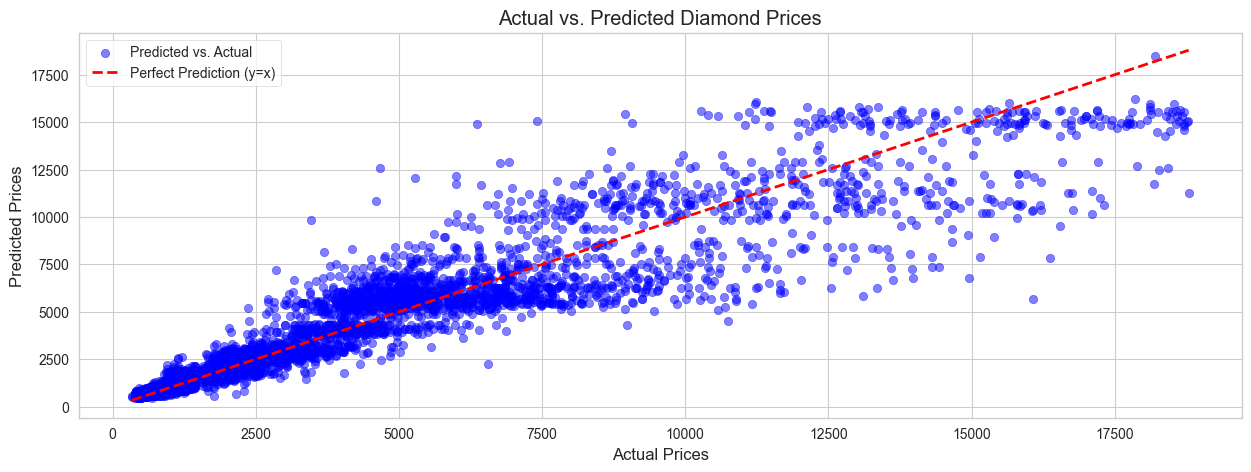

In [99]:
plt.figure(figsize=(15, 5))

plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue', label='Predicted vs. Actual')

line = np.linspace(min(y_test.min(), y_pred_xgb.min()), max(y_test.max(), y_pred_xgb.max()), 100)

plt.plot(line, line, color ='red', linestyle='--', linewidth = 2 ,label='Perfect Prediction (y=x)')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Diamond Prices')
plt.legend()
plt.show()

In [ ]:
# now we can use our machine learning model to predict the price of a diamond

In [83]:
print("Diamond Price Prediction")
a = float(input("Carat Size: "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = float(input("Size: "))
features = np.array([[a, b, c]])
print("Predicted Diamond's Price in $ =", xgb_best.predict(features))

Diamond Price Prediction


Carat Size:  2
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5):  5
Size:  3


Predicted Diamond's Price in $ = [16990.775]


# Summary

diamond price analysis and prediction using the Python programming language. 
According to the diamond price analysis, 
we can say that the price and size of premium diamonds are higher than other types of diamonds. 

# Conclusion 

Impact of Models:-
Accurate diamond price predictions help jewelers, buyers, and insurers determine fair prices.

Best Model: 
XGboost, due to its high R2 and low MSE on both training and test sets.

Good Alternatives: 
Random Forest , Decison Tree and KNN also show strong performance.

Baseline Models: 
Linear Regression and SVR provide good baselines but are outperformed by ensemble methods.


# Practical Application :-

1) Price recommendations for e-commerce platforms.
2) Inventory valuation for jewelers.
3) Fraud detection by comparing predicted prices with market data.

# Storing The Best Model in Pickle For Web App Using Streamlit

In [74]:
import pickle

In [76]:
with open("xgboost_best_model.pkl","wb") as file:
    pickle.dump(xgb_best, file)